In [6]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Sklearn for data import and scalers
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#interactive plot
# Please consult information to update plotly.offline 
# e.g. https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee
import plotly
from plotly.offline import plot
from plotly.graph_objs import *

In [7]:
data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)
# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# 3 - Principal Component Analysis 
## Select  a  subset  of  3  to  6  features  related  to  the  same  aspect  of  the  phenomenon  to  which  your  data  set relates to. Explain your choice.

Features chosen: purchases, one_off_purchases, installments_purchases, purchases_freq, purchases_installments_freq, one_off_purhcases_freq

In [8]:
#drop all features except 'balance'
data.drop(['BALANCE','BALANCE_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1, inplace=True)
data.shape


(8950, 6)

 ### Visualization of Iris Data by Principal Components / SVD

In [9]:
#Normalize data by Range
means = data.mean(axis=0)
Rmax = data.max(axis=0)
Rmin = data.min(axis=0)

X_normed_range = (data - means) / (Rmax - Rmin)

#normalize data using z-score
X = data.values
scaler = StandardScaler()
X_normed_zscore = scaler.fit_transform(X)




 #### 2.1 Calculate the Principal Components (PC's) by the conventional' method
 - Use the covariance matrix of the normalized data to obtain the principal components.
 - Notice the need to transpose the data matrix.

In [10]:
## Covariance matrix of the normalized data
cov_matrix = np.cov(X_normed_zscore.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# order descendingly by largest eigenvalue
order = np.argsort((np.argsort(eigenvalues) * -1))
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:,order]

print('Eigenvectors \n%s' %eigenvectors)
print('\nEigenvalues \n%s' %eigenvalues)


Eigenvectors 
[[ 3.39209360e-01  4.85118776e-01 -2.69517299e-01  1.22058398e-01
  -7.48988896e-01 -3.27809343e-02]
 [ 5.05328416e-01  4.05605494e-01 -2.77604651e-02  4.90521000e-01
   5.81932749e-01 -1.00077932e-02]
 [-1.26301960e-01  4.01777019e-01 -5.86258188e-01 -6.12359318e-01
   3.16812036e-01 -5.97543207e-02]
 [-4.44334520e-01  4.25285382e-01  3.42356009e-01  1.11302981e-01
  -1.30923727e-04 -7.01500656e-01]
 [ 2.46150276e-01  3.54183095e-01  6.81903594e-01 -5.01616339e-01
   1.04042012e-04  3.12014268e-01]
 [-5.96326163e-01  3.63876164e-01 -2.62863185e-02  3.24807108e-01
   1.22270562e-04  6.37023235e-01]]

Eigenvalues 
[1.40495748e+00 3.27517176e+00 8.43922276e-01 4.23376951e-01
 1.16556475e-05 5.32303477e-02]


In [11]:
# generate PCA component space (PCA scores)
pc = np.dot(X_normed_zscore, eigenvectors)
pc

array([[ 3.32678769e-01, -1.33188623e+00, -3.91218602e-01,
         7.73767944e-03, -1.10288604e-04, -5.82135693e-02],
       [ 6.40413531e-01, -1.64883984e+00, -4.53992982e-01,
        -4.74369141e-02, -6.04456680e-05,  1.07292345e-01],
       [ 7.16580019e-01,  9.62559863e-01,  2.57437348e+00,
        -1.17892168e+00, -7.34366739e-06, -6.11185595e-01],
       ...,
       [-1.27973101e+00, -5.84716242e-02,  1.00926281e-01,
         6.38983069e-01, -1.59138976e-04, -2.92430975e-01],
       [ 6.40413531e-01, -1.64883984e+00, -4.53992982e-01,
        -4.74369141e-02, -6.04456680e-05,  1.07292345e-01],
       [ 9.58841064e-01,  3.64488768e-01,  1.48236637e+00,
        -5.97992031e-01, -2.21283867e-06, -3.84042407e-01]])

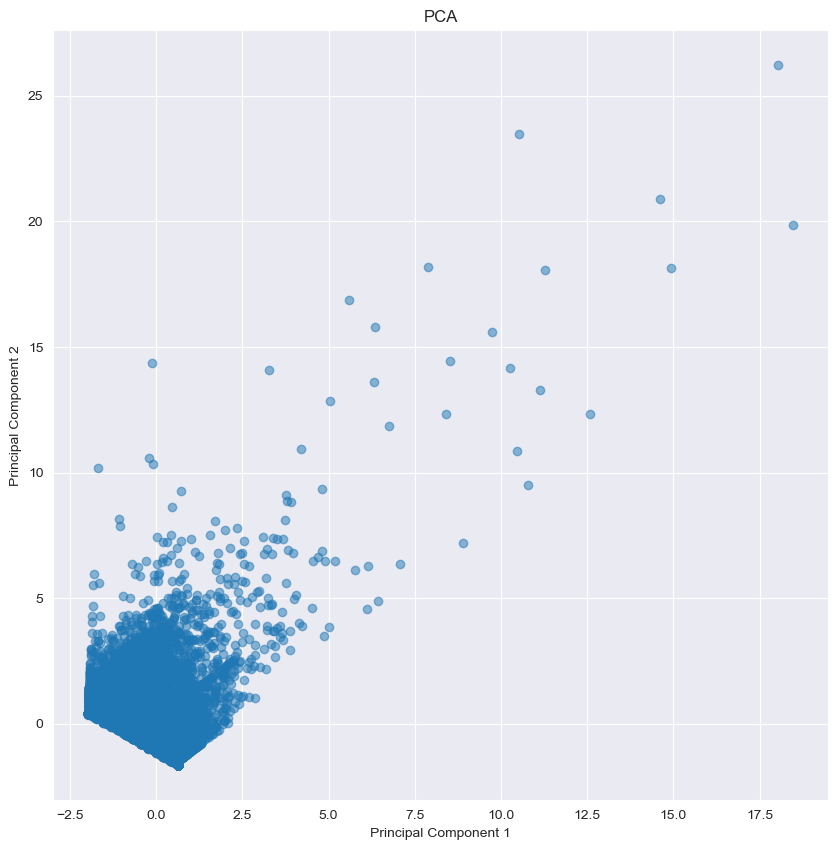

In [12]:
#plotting the PCA
plt.figure(figsize=(10,10))
plt.scatter(pc[:,0], pc[:,1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()


#### 2.2 Project PCA's on a 3D plot

## a)  Visualize the data over these features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.

### Normalization by range and std dev

## b) Choose between conventional PCA or SVD for the visualization. Make a comment whether one of the normalizations is better and why. 

### PCA for range normalization

### PCA for std dev normalization

### SVD for range norm

### SVD for std dev norm